![alt text](https://github.com/BITalinoWorld/python-lab-guides/raw/master/BITalino%20Hands-on/images/bitalinobar.jpg)

# 0.Setting up


---





*   Install the Anaconda Python distribution that best suits your platform (Python 2.7 is recommended):

  [https://www.anaconda.com/distribution/](https://www.anaconda.com/distribution/)

* Install the BITalino Python API (recommended):

  https://github.com/BITalinoWorld/revolution-python-api

* Install BITalino's ServerBIT (r)evolution:

  https://github.com/BITalinoWorld/revolution-python-serverbit

* Install OpenSignals (r)evolution Software:

  http://bitalino.com/en/software

* Install the BioSPPy Toolbox (may come in handy):

  https://github.com/PIA-Group/BioSPPy
  
* Get a good code editor:

    * **Spyder** is already included with Anaconda or 
    * **PyCharm** https://www.jetbrains.com/pycharm/

* Enjoy executing some code (e.g. by launching a Jupyter notebook)

* Prepare your device by connecting the battery (i.e. slide the battery connector onto the white socket on the BITalino block labelled as PWR)

* Turn your device on by sliding the power button to the ON position; a white LED will start fading in / out, meaning that the device is in standby

* Get familiar with the architecture of BITalino ([datasheet](http://bitalino.com/datasheets/REVOLUTION_BITalino_Board_Kit_Datasheet.pdf))

![alt text ](https://github.com/BITalinoWorld/python-lab-guides/blob/master/BITalino%20Hands-on/images/BITalino_cut.jpg?raw=true)

![alt text](https://github.com/BITalinoWorld/python-lab-guides/raw/master/BITalino%20Hands-on/images/bitalinobar.jpg)

# 1.Acquisition


---



Once your BITalino is turned on, pair the device with your computer via the Bluetooth device manager using the PIN 1234 (this is a one-time process). Your device will be named BITalino-XX-XX, with XX-XX being the last four hex digits of your devices' MAC address.

**IMPORTANT NOTE**: The MAC address is the sequence XX:XX:XX:XX:XX:XX found on the label on the back of the devices' BT block and / or on the back of the cardboard packaging where the device is shipped.

The following steps should guide you through to a first glimpse of your signals in real-time:

* Launch **OpenSignals (r)evolution**

* Enable your device for acquisition by pressing the magnifying glass icon on the main screen and clicking the box showing the MAC address of your device (this is a one-time process) 
 * **IMPORTANT NOTE**: The ENABLE button needs to be blue

* You can proceed directly to record data, but you can also use this screen to configure the acquisition settings for your device (e.g. select the channels to be acquired, identify the type of sensor or change the sampling rate)

* It is recommended that you review the sensor datasheets to obtain instructions regarding the typical electrode placement, sensor specifications and the transfer functions that can be used to convert the raw data into the correct physical units:

  * [Electromiography (EMG)](http://bitalino.com/datasheets/REVOLUTION_EMG_Sensor_Datasheet.pdf)
  
  * [Electrodermal Activity (EDA)](http://bitalino.com/datasheets/REVOLUTION_EDA_Sensor_Datasheet.pdf)
  * [Electrocardiography (ECG)](http://bitalino.com/datasheets/REVOLUTION_ECG_Sensor_Datasheet.pdf)
  * [Electroencephalography (EEG)](http://bitalino.com/datasheets/EEG_Sensor_Datasheet.pdf)
  * [Accelerometry (ACC)](http://bitalino.com/datasheets/REVOLUTION_ACC_Sensor_Datasheet.pdf)
  * [Optical Sensing (LUX)](http://bitalino.com/datasheets/REVOLUTION_LUX_Sensor_Datasheet.pdf)
  * [Event Annotation (BTN)](http://bitalino.com/datasheets/REVOLUTION_BTN_Sensor_Datasheet.pdf)
* **Record a signal** by pressing the red circle on the main menu of the software

![alt text ](https://github.com/BITalinoWorld/python-lab-guides/raw/master/BITalino%20Hands-on/images/opensig.jpg)
  

![alt text](https://github.com/BITalinoWorld/python-lab-guides/raw/master/BITalino%20Hands-on/images/bitalinobar.jpg)

# 2.Opening Recorded Data in Python


---



Locate a recording on your hard drive; for your convenience, we provide the [SampleACC.txt](https://github.com/BITalinoWorld/python-lab-guides/blob/master/BITalino%20Hands-on/SampleACC.txt) file with a snippet of Accelerometry (ACC) data.

You can make a simple experiment using the Python script [LoadFile.py](https://github.com/BITalinoWorld/python-lab-guides/blob/master/BITalino%20Hands-on/LoadFile.py); this code uses the function [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) (in this case made available through the PyLab module), to load the recorded data onto a variable in your program and display it in a graphic:



In [0]:
!git clone https://github.com/BITalinoWorld/python-lab-guides >/dev/null 2>&1

In [0]:
cd /content/python-lab-guides

/content/python-lab-guides


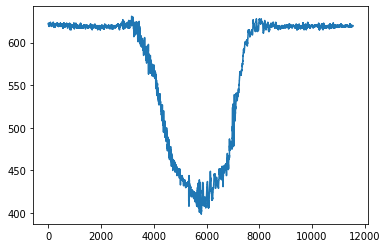

In [0]:
from pylab import *
%matplotlib inline

data = loadtxt("BITalino Hands-on/SampleACC.txt")

plot(data[:,5])

**IMPORTANT NOTE**: In the [SampleACC.txt]((https://github.com/BITalinoWorld/python-lab-guides/blob/master/BITalino%20Hands-on/SampleACC.txt)) file, ACC data was recorded using the BITalino analog input A5, and can be found on column 6 of the file; given that Python uses zero-based numbering for indexing, the data matrix is being sliced in column 5 (i.e. data[:,5]). Further information about the content of the files recorded using OpenSignals (r)evolution can be found at: http://forum.bitalino.com/viewtopic.php?f=15&t=481&p=1553#p1553  

![alt text](https://github.com/BITalinoWorld/python-lab-guides/raw/master/BITalino%20Hands-on/images/bitalinobar.jpg)

# 3.Post-Processing a Signal


---



Based on the previous code, another experiment you can do is to compute the envelope of the EMG signal (i.e. smooth the absolute value of the signal after removing the mean).

To facilitate this task, you can use the Python script [ProcessFile.py](https://github.com/BITalinoWorld/python-lab-guides/blob/master/BITalino%20Hands-on/ProcessFile.py), which loads an EMG signal sample in order to remove its baseline and apply a low-pass filter to it:

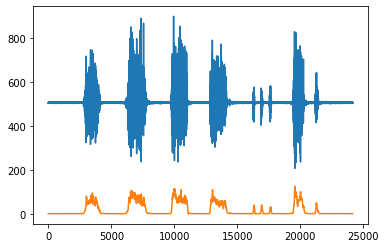

In [0]:
from pylab import *
from numpy import *
from scipy import signal

def lowpass(s, f, order=2, fs=1000.0):
    b, a = signal.butter(order, f / (fs/2))
    return signal.lfilter(b, a, s)

data = loadtxt("BITalino Hands-on/SampleEMG.txt")

emg_data = data[:,5]

abs_data = abs(emg_data-mean(emg_data))

proc_data = lowpass(abs_data, 10) # filter with a lowpass filter at 10Hz

plot(emg_data)

plot(proc_data)

![alt text](https://github.com/BITalinoWorld/python-lab-guides/raw/master/BITalino%20Hands-on/images/bitalinobar.jpg)

# 4.Analyzing your Data


---



Python is often referred to as "the batteries included language", meaning that there are plenty of useful modules either bundled or contributed by the community. Biosignals are no exception and some libraries already bundle basic signal processing and analytics components.

One experiment you can do, is to extract the heartbeat waveforms and determine the instant heart rate for an ECG signal using the BioSPPy toolbox. To facilitate this task, you can use the Python script [AnalyzeFile.py](https://github.com/BITalinoWorld/python-lab-guides/blob/master/BITalino%20Hands-on/AnalyzeFile.py), which loads an ECG signal sample in order to filter it, extract several convenient features and plot them in a chart:

In [0]:
!pip install biosppy #>/dev/null 2>&1w
!pip install matplotlib
!pip install numpy #>/dev/null 2>&1w
!pip install bitalino #>/dev/null 2>&1w
!pip install serial

In [0]:
from pylab import *
from biosppy.signals import ecg

data = loadtxt("BITalino Hands-on/SampleECG.txt")[:,-1]

out = ecg.ecg(signal=data, sampling_rate=1000., show=True)

ModuleNotFoundError: ignored

In the previous example, the toolbox is used in a more automated manner to take in raw data and produce a graphical output. However, you also have the possibility to access the extracted features and manipulate them directly. The following experiment demonstrates just that; the raw data is processed using the toolbox, plotted against the filtered version and annotated with vertical lines placed on the positions of the R-peaks.

In [0]:
from pylab import *
from biosppy.signals import ecg

data = loadtxt("BITalino Hands-on/SampleECG.txt")[:,-1]

out = ecg.ecg(signal=data, sampling_rate=1000., show=False)

raw = data-data.mean()
filtered = out['filtered']-out['filtered'].mean()

plot(raw)
plot(filtered, 'k')

vlines(out['rpeaks'], min(raw)*2, max(raw)*2, 'gray', 'dashed')

legend(['raw', 'filtered', 'R-peaks'])

![alt text](https://github.com/BITalinoWorld/python-lab-guides/raw/master/BITalino%20Hands-on/images/bitalinobar.jpg)

# 5.Asynchronous Measurement and Control


---



Until now we've seen how to work with data recorded using OpenSignals (r)evolution in post-processing tasks, however, it is also possible to interact with the device directly from your Python program.

The BITalino MCU supports multiple operation modes (detailed in the [datasheet](http://bitalino.com/datasheets/REVOLUTION_MCU_Block_Datasheet.pdf)), which are conveniently exposed through user-friendly high-level methods provided on the [APIs](https://bitalino.com/en/development/apis). Our experiments will use the [Python API](https://github.com/BITalinoWorld/revolution-python-api), for which documentation is available here: http://bitalino.com/pyAPI/

The example [LightsBIT.py](https://github.com/BITalinoWorld/python-lab-guides/blob/master/BITalino%20Hands-on/LightsBIT.py) (shown bellow) demonstrates how to read and change the [state](http://bitalino.com/pyAPI/#bitalino.BITalino.state) of the device. Whenever the program is executed, the LED actuator and the low battery indicator LED will turn ON if they were turned off and turn OFF otherwise, printing its state on screen.

To control the LED actuator, the [trigger](http://bitalino.com/pyAPI/#bitalino.BITalino.trigger) method is used, while the [battery](http://bitalino.com/pyAPI/#bitalino.BITalino.battery) method is used to obtain and change the low battery level threshold in such a way that the LED turns on or off.

An annotated notebook version of this script is available at [LightsBIT_steps.ipynb](https://github.com/BITalinoWorld/python-lab-guides/blob/master/BITalino%20Hands-on/detailed/LightsBIT_steps.ipynb)

**IMPORTANT NOTE**: You need to adapt the code so that the macAddress variable has the correct value for your operating system and device MAC address.


In [0]:
import bitalino
import numpy

# Mac OS
# macAddress = "/dev/tty.BITalino-XX-XX-DevB"

# Windows
macAddress = "XX:XX:XX:XX:XX:XX"
 
device = bitalino.BITalino(macAddress)

state = device.state()

toggle = 1-state['digitalChannels'][2]

device.trigger([toggle, 0])

device.battery(0 if toggle else 63)

print ("LIGHTS ON" if toggle else "LIGHTS OFF")

device.close()

In the previous example, only when the program is executed an action is produced. Combining the same principles with a repetition structure introduces us to a more interactive behaviour.

This is illustrated on our [ButtonBIT.py](https://github.com/BITalinoWorld/python-lab-guides/blob/master/BITalino%20Hands-on/ButtonBIT.py) example (shown bellow), where a loop continuously checks the [state](http://bitalino.com/pyAPI/#bitalino.BITalino.state) of the device and turns the LED actuator and low battery LED ON or OFF, based on the state of the Pushbutton (BTN) sensor.

By default, the BTN sensor is connected to the BITalino digital input I1 (hence the fetching of state['digitalChannels'][0]), and depending on whether the button is pressed, the abovementioned LEDs will turn ON or OFF accordingly.

An annotated version notebook of this script can be seen at [ButtonBIT_steps.ipynb](https://github.com/BITalinoWorld/python-lab-guides/blob/master/BITalino%20Hands-on/detailed/ButtonBIT_steps.ipynb)

In [0]:
import bitalino
import numpy

# Mac OS
# macAddress = "/dev/tty.BITalino-XX-XX-DevB"

# Windows
macAddress = "XX:XX:XX:XX:XX:XX"
 
device = bitalino.BITalino(macAddress)

try:
  while True:
      state = device.state()
      
      toggle = state['digitalChannels'][0]
      
      device.trigger([toggle, 0])
      
      device.battery(0 if toggle else 63)
      
      print ("LIGHTS ON" if toggle else "LIGHTS OFF")

finally:
  device.close()

![alt text](https://github.com/BITalinoWorld/python-lab-guides/raw/master/BITalino%20Hands-on/images/bitalinobar.jpg)

# 6.Real-Time Signal Processing


---

In the previous section we have seen how to asynchronously interface with BITalino from within a Python program. A big downside of asynchronous communication is the fact that the time in-between readings (i.e. sampling interval) is variable.

Although many informal applications can cope with this operation model, for digital signal processing and research use it is of utmost importance to have a known and accurate sampling interval. For this reason, BITalino provides an operation mode where data is streamed at a fixed sampling rate.

Our [MuscleBIT.py](https://github.com/BITalinoWorld/python-lab-guides/blob/master/BITalino%20Hands-on/MuscleBIT.py) example (shown bellow) illustrates this operation mode. The streaming process is initiated by calling the [start](http://bitalino.com/pyAPI/#bitalino.BITalino.start) method, in which a sampling rate and set of channels to be acquired can be specified.

Once the device starts streaming, it is fundamental that the program reads the samples sent by the device in a timely and continuous (or near-continuous) manner, otherwise it will stop streaming automatically. In our example, this is achieved by putting the call to the [read](http://bitalino.com/pyAPI/#bitalino.BITalino.read) method inside a repetition structure.

This particular example computes the EMG signal envelope in real-time and turns the Buzzer (BUZ) actuator on in case a certain threshold is exceeded. Pressing the BTN sensor for a few seconds will stop the program.

An annotated version notebook of this script can be seen at [MuscleBIT_steps.ipynb](https://github.com/BITalinoWorld/python-lab-guides/blob/master/BITalino%20Hands-on/detailed/MuscleBIT_steps.ipynb).

**IMPORTANT NOTE**: This is a time-critical operation and BITalino has a small internal buffer to accumulate samples (roughly less than 2 seconds), reason for which if the time in-between calls to the read method is much higher than the rate at which the device is streaming data (e.g. due to the time taken by calculations) the internal buffer will fill and the device will stop streaming data. A crucial component in this process is the amount of samples acquired from the device at a time; for additional information please refer to: http://forum.bitalino.com/viewtopic.php?t=129#p227





In [0]:
import bitalino
import numpy
import time

# Mac OS
# macAddress = "/dev/tty.BITalino-XX-XX-DevB"

# Windows
macAddress = "XX:XX:XX:XX:XX:XX"
   
device = bitalino.BITalino(macAddress)
time.sleep(1)

srate = 1000
nframes = 100
threshold = 5

device.start(srate, [0])
print ("START")

try:
    while True:

        data = device.read(nframes)
        
        if numpy.mean(data[:, 1]) < 1: break

        EMG = data[:, -1]
        
        envelope = numpy.mean(abs(numpy.diff(EMG)))

        if envelope > threshold:
            device.trigger([0, 1])
        else:
            device.trigger([0, 0])

finally:
    print ("STOP")
    device.trigger([0, 0])
    device.stop()
    device.close()

![alt text](https://github.com/BITalinoWorld/python-lab-guides/raw/master/BITalino%20Hands-on/images/bitalinobar.jpg)

# 7.Live on the Web Browser


---

Struggling with data acquisition in Python? We've handled part of the heavy load for you by creating [ServerBIT](https://github.com/BITalinoWorld/revolution-python-serverbit), an easy-to-install software bundle that runs in a service-like manner, continuously streaming data from the device to third-party applications (e.g. your web browser).

Once installed, you need to configure the MAC address and channels to be acquired through the [config.json](https://github.com/BITalinoWorld/revolution-python-serverbit#settings-in-configjson) by following the instructions described here:
https://github.com/BITalinoWorld/revolution-python-serverbit#pre-configured-installers

ServerBIT runs in a resilient manner, meaning that once it is launched it will automatically attempt to connect to your configured device and, even if the device is not turned on or the connection is lost, it will periodically attempt to reconnect and resume the data streaming process.

Data is streamed using [WebSockets](https://developer.mozilla.org/en-US/docs/Web/API/WebSockets_API) technology, helping you receive the data stream even in a web browser.

With the ServerBIT running, if you open the [ClientBIT.html](https://github.com/BITalinoWorld/revolution-python-serverbit/blob/master/ClientBIT.html) sample web page (source code shown bellow) the signals from the sensor connected to channel A1 will be displayed in real time.

The ClientBIT.html user interface is implemented using open technologies, namely HTML/CSS/JavaScript, with graphics managed using the [Flot](http://www.flotcharts.org/flot/examples/basic-options/index.html) library, so feel free to scavange the web and fiddle with the source code to adapt it to your particular ideas.

    <script language="javascript" type="text/javascript" src="jquery.js"></script> 
    <script language="javascript" type="text/javascript" src="jquery.flot.js"></script> 
    <script type="text/javascript">
        // Establish a connection to the ServerBIT
        var ws = new WebSocket("ws://localhost:9001/");
        ws.onopen = function() {
        };
        // Process the responses sent by the ServerBIT
        ws.onmessage = function (e) {
            data = JSON.parse(e.data)
            var d1 = [];
            ch = 'A1'
            for (var i = 0; i < data[ch].length; i += 1)
                d1.push([i, data[ch][i]]);
            $.plot($("#placeholder"), [ d1 ], {yaxis: {min:0, max: 1024}});
        };
        // Detect when the page is unloaded or close
        window.onbeforeunload = function() {
            ws.onclose = function () {};
            ws.close()
        };        
        
    </script>
    <body>
        <div><h1>BITalinoWS</h1></div>
	<div id="placeholder" style="width:600px;height:300px;"></div> 
    </body>

![alt text](https://github.com/BITalinoWorld/python-lab-guides/raw/master/BITalino%20Hands-on/images/bitalinobar.jpg)
#8.External Links


---

* BITalino Forum allows you to learn, share and discuss your experiences with others:

  http://forum.bitalino.com/

* BITalino Python API documentation is available here:
  
  http://bitalino.com/pyAPI/

* BITalino APIs for several other languages can be found at:
  
  http://bitalino.com/en/development/apis

* BioSPPy toolbox documentation is available here:
  
  http://biosppy.readthedocs.io/en/stable/

* BITalinoWorld channel on YouTube has a few nifty videos:
  
  https://www.youtube.com/user/BITalinoWorld/videos

* [PLUX](https://plux.info/) and [biosignalsplux](https://www.biosignalsplux.com/) have solutions that enable you to extend your research

